In [1]:
from retentioneering import init_config
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/oxana/Documents/Test_task/test2.gz', compression='gzip')

In [3]:
df.head()

,event_timestamp,current_path,next_path,user_id,browser,os,session,mapped_event,utm_source,utm_medium
0,2020-07-07 14:55:07,/catalog/phone/225/apple/iphone-6s-plus/6s-plu...,NaN,000019de-e3c2-4af0-8e0c-979b0d5b63cd,Chrome,Windows,0.0,session_start,NaN,NaN
1,2020-07-07 14:55:08,/catalog/phone/225/apple/iphone-6s-plus/6s-plu...,NaN,000019de-e3c2-4af0-8e0c-979b0d5b63cd,Chrome,Windows,0.0,catalog_page,NaN,NaN
2,2020-07-07 14:55:09,/catalog/phone/225/apple/iphone-6s-plus/6s-plu...,NaN,000019de-e3c2-4af0-8e0c-979b0d5b63cd,Chrome,Windows,0.0,lost,NaN,NaN
3,2020-06-20 17:13:51,/catalog/other/10691/5391503,NaN,00009a1c-69ad-4bbf-81e0-75dad05075b5,Mobile Safari,iOS,1.0,session_start,NaN,NaN
4,2020-06-20 17:13:52,/catalog/other/10691/5391503,NaN,00009a1c-69ad-4bbf-81e0-75dad05075b5,Mobile Safari,iOS,1.0,OpenProductPage,NaN,NaN


Описание датасета:   
- event_timestamp - серверное время     
- current_path - адрес страницы, на которой находится пользователь   
- next_path - адрес страницы на которую переходит пользователь   
- user_id - id пользователя     
- session - номер сессии   
- os - операционная система   
- browser - браузер     
- mapped_event - размеченное событие:    
   - *session_start - добавляется в начало сессии за секунду до первого события*   
   - *pass - оформление заказа*   
   - *lost - добавляется через секунду после самого последнего события*   
   - *session_end - добавляется в конце сессии, если это не последняя сессия пользователя через секунду после последнего события в сессии*   
   - *catalog_page - открытие страницы каталога*   
   - *OpenProductPage - открытие страницы продукта*   
   - *main_page - главная страница*    
   - *cart_page - страница корзины*   
   - *search_result_page - страница результатов поиска*   
   - *AddTo_Cart - добавление в корзину*   
- utm_source, utm_medium - параметры UTM

In [4]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], format='%Y-%m-%d %H:%M:%S')

In [5]:
init_config(
    experiments_folder='experiments', 
    index_col='user_id', 
    event_col='mapped_event', 
    event_time_col='event_timestamp', 
    positive_target_event='passed', 
    negative_target_event='lost', 
    pos_target_definition={'time_limit': 600},
    neg_target_definition={})

In [6]:
df = df.retention.prepare()

In [7]:
print('pos events:', len(df[df['mapped_event'] == 'passed']))

pos events: 275242


In [8]:
print('Количество рекламных каналов:', df['utm_source'].nunique())

Количество рекламных каналов: 213


In [9]:
df['utm_source'].value_counts().head(10)

yandex           379137
yandexmarket      41822
cpamit            40552
promo             35224
flocktory         12792
trigger           11659
gdeslon            9639
sberbank           6267
nadavi_moscow      6181
actionpay          5862
Name: utm_source, dtype: int64

Топ 10 РК по привлечению клиентов

Посмотрим на клиентов, пришедших через РК Сбербанк

array([0, 1, 1, ..., 2, 1, 2])

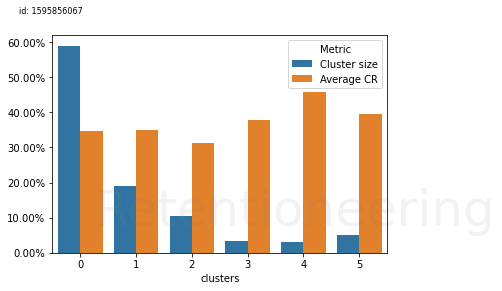

In [10]:
df.query('utm_source == "sberbank"').retention.get_clusters(method='simple_cluster', n_clusters=6, plot_type='cluster_bar', use_csi=False, refit_cluster=True)

,n,n - 1,n - 2,n - 3
passed,1.0,0.0,0.000000,0.000000
lost,0.0,1.0,0.000000,0.000000
other_page,0.0,0.0,0.982857,0.225714
session_start,0.0,0.0,0.012857,0.715714
Click_Search,0.0,0.0,0.001429,0.011429
Click_PersonalArea,0.0,0.0,0.001429,0.001429
Click_Catalog_Header_Wrap,0.0,0.0,0.000000,0.007143
GoTo_Cart,0.0,0.0,0.000000,0.004286
Click_Catalog_Breadcrumbs,0.0,0.0,0.001429,0.002857
session_end,0.0,0.0,0.000000,0.004286


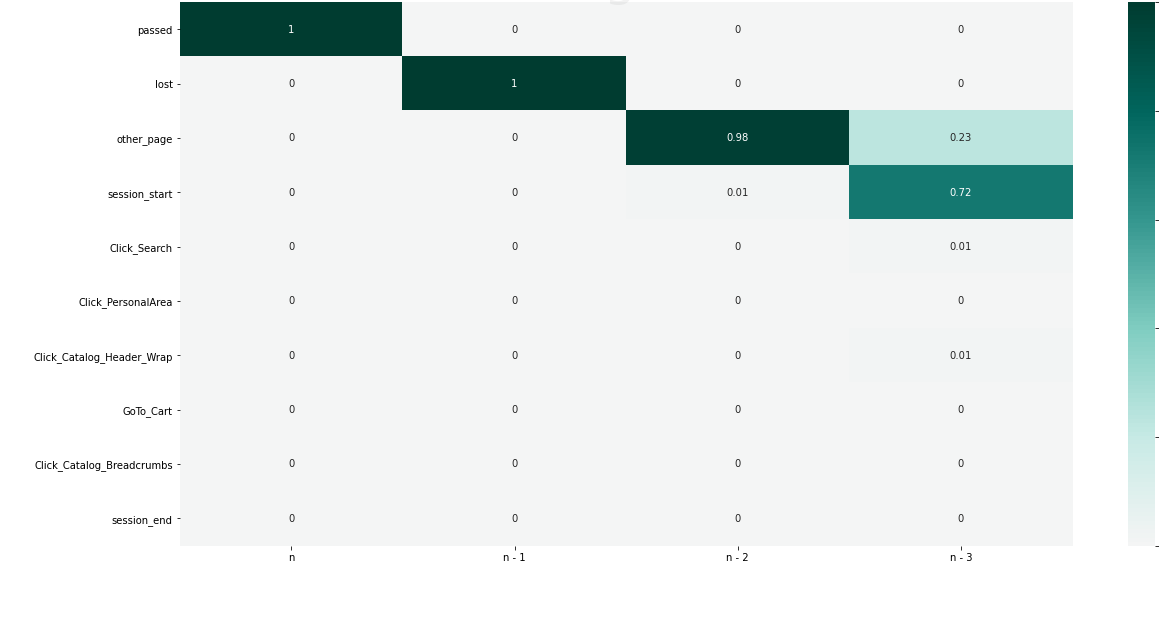

In [11]:
df.query('utm_source == "sberbank"').retention.get_step_matrix(max_steps=4, reverse = 'pos')

,n,n - 1,n - 2,n - 3
lost,1.0,0.000000,0.000000,0.000000
other_page,0.0,0.982857,0.225714,0.080000
session_start,0.0,0.012857,0.715714,0.160000
session_end,0.0,0.000000,0.004286,0.048571
Click_Search,0.0,0.001429,0.011429,0.002857
Click_PersonalArea,0.0,0.001429,0.001429,0.000000
Click_Catalog_Header_Wrap,0.0,0.000000,0.007143,0.004286
GoTo_Cart,0.0,0.000000,0.004286,0.001429
Click_Catalog_Breadcrumbs,0.0,0.001429,0.002857,0.002857


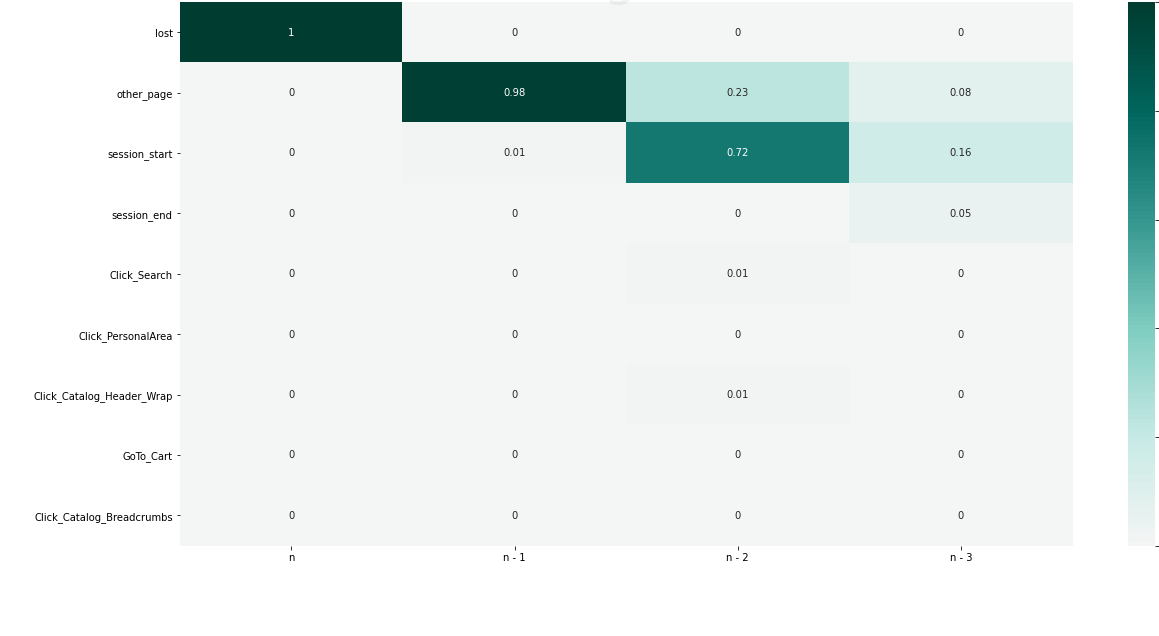

In [12]:
df.query('utm_source == "sberbank"').retention.get_step_matrix(max_steps=4, reverse = 'neg')